# Comparison of models like vs dislike condition

## Import components

In [1]:
import glam
import pandas as pd
import numpy as np
import os.path
import numpy
import statistics 

import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF
import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob
import os



Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
# Load params from DISLIKE hierarchical model (using inverted input [3-value])
#Dislike_sufix = '_Dislike_InvInputDislike'
Dislike_sufix = '_Dislike_NoBin_InvInputDislike_NUTS'
glam_full_dislike_estimates = np.load(str('CompareLikeDislike/estimates/glam_FF2018_full_hierarchical_cv'+Dislike_sufix+'.npy'))   


# Load params from LIKE hierarchical model
#Like_sufix = '_Like_NoBin_NUTS'
Like_sufix = '_Like_NoBin_NUTS'
glam_full_like_estimates = np.load(str('CompareLikeDislike/estimates/glam_FF2018_full_hierarchical_cv'+Like_sufix+'.npy'))   




## Parameters Like

In [3]:
params_part_like = pd.DataFrame.from_dict(glam_full_like_estimates.item(0))
params_part_like

,gamma_mu,tau_sd,s,p_error,t0,SNR_sd,b,v_mu,SNR_mu,gamma_sd,tau_mu,tau,v,v_sd,gamma,SNR
0,-0.25,1.18,0.007837,0.05,0.0,41.34,1.0,0.000054,150.21,0.33,2.99,3.36,0.000046,0.000014,0.00,164.97
1,-0.25,1.18,0.010210,0.05,0.0,41.34,1.0,0.000054,150.21,0.33,2.99,3.96,0.000074,0.000014,0.31,116.22
2,-0.25,1.18,0.008302,0.05,0.0,41.34,1.0,0.000054,150.21,0.33,2.99,2.79,0.000059,0.000014,-0.06,139.45
3,-0.25,1.18,0.006641,0.05,0.0,41.34,1.0,0.000054,150.21,0.33,2.99,4.32,0.000044,0.000014,-0.07,154.18
4,-0.25,1.18,0.007186,0.05,0.0,41.34,1.0,0.000054,150.21,0.33,2.99,2.71,0.000088,0.000014,-0.41,84.20
5,-0.25,1.18,0.007272,0.05,0.0,41.34,1.0,0.000054,150.21,0.33,2.99,2.28,0.000063,0.000014,0.30,110.46
6,-0.25,1.18,0.010141,0.05,0.0,41.34,1.0,0.000054,150.21,0.33,2.99,2.90,0.000072,0.000014,-0.05,125.37
7,-0.25,1.18,0.007481,0.05,0.0,41.34,1.0,0.000054,150.21,0.33,2.99,2.29,0.000046,0.000014,0.02,142.59
8,-0.25,1.18,0.009582,0.05,0.0,41.34,1.0,0.000054,150.21,0.33,2.99,1.20,0.000054,0.000014,-0.91,172.72
9,-0.25,1.18,0.008531,0.05,0.0,41.34,1.0,0.000054,150.21,0.33,2.99,4.63,0.000049,0.000014,0.02,142.71


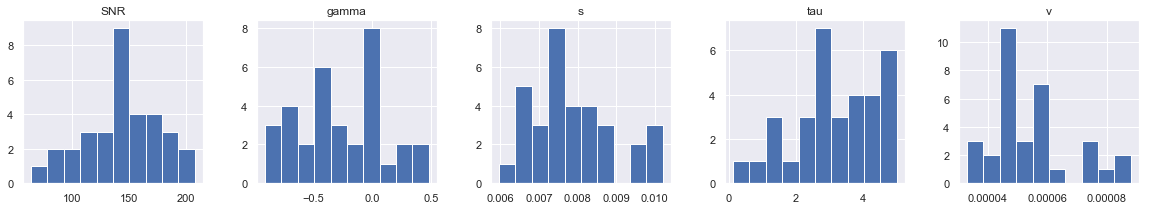

In [4]:
hist = params_part_like[['SNR','gamma','tau','v','s']].hist(figsize = [20,3] , layout=[1,5])

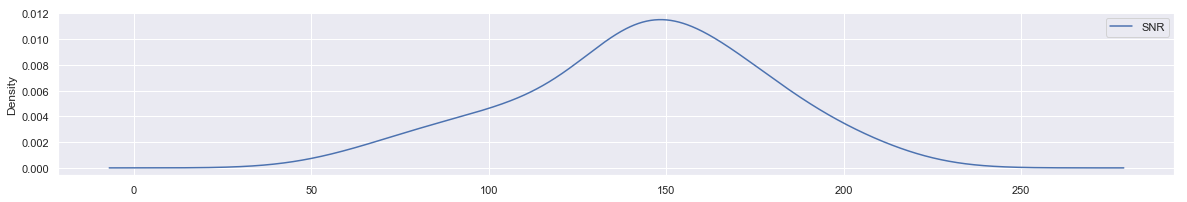

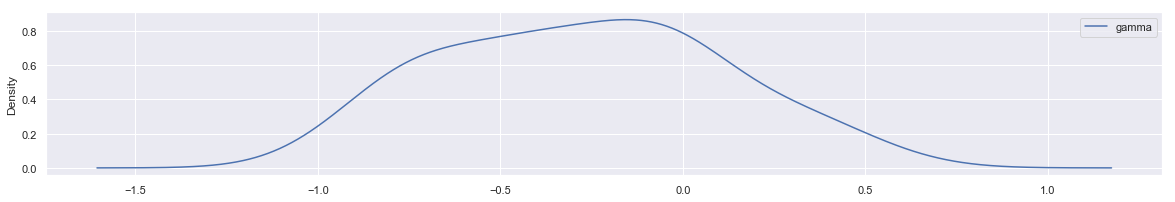

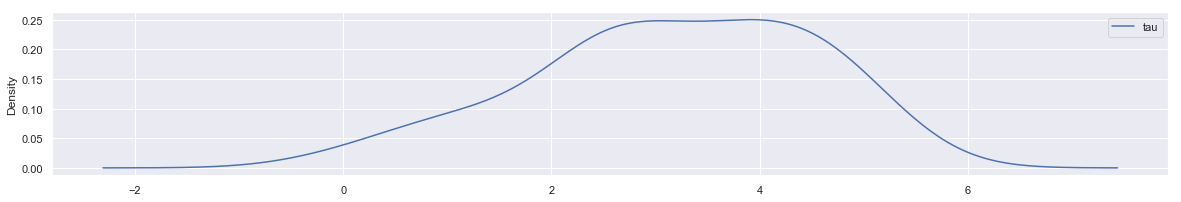

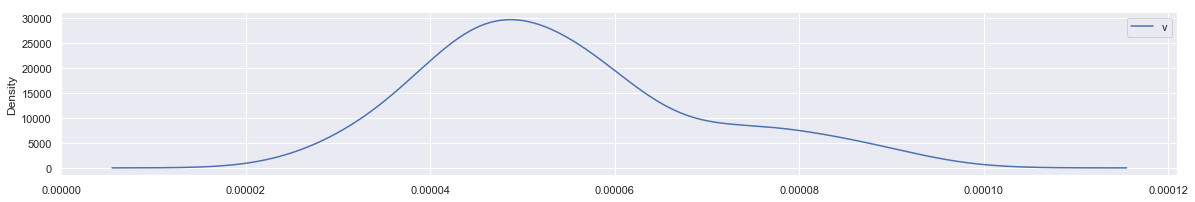

In [5]:
#plt.subplot(411)        
params_part_like[['SNR']].plot.kde(figsize = [20,3])
#plt.subplot(412)        
params_part_like[['gamma']].plot.kde(figsize = [20,3])
#plt.subplot(413)        
params_part_like[['tau']].plot.kde(figsize = [20,3])
#plt.subplot(414)        
params_part_like[['v']].plot.kde(figsize = [20,3])

## Parameters Dislike

In [6]:
params_part_dislike = pd.DataFrame.from_dict(glam_full_dislike_estimates.item(0))
params_part_dislike

,tau_sd,tau,b,v_mu,SNR_sd,gamma_sd,t0,v,SNR_mu,tau_mu,gamma_mu,v_sd,gamma,s,SNR,p_error
0,1.12,3.43,1.0,0.000045,33.46,0.49,0.0,0.000037,190.34,2.79,-0.1,0.00001,0.50,0.006475,168.89,0.05
1,1.12,2.06,1.0,0.000045,33.46,0.49,0.0,0.000051,190.34,2.79,-0.1,0.00001,0.69,0.009937,170.08,0.05
2,1.12,0.77,1.0,0.000045,33.46,0.49,0.0,0.000044,190.34,2.79,-0.1,0.00001,0.84,0.007935,181.01,0.05
3,1.12,2.47,1.0,0.000045,33.46,0.49,0.0,0.000038,190.34,2.79,-0.1,0.00001,0.02,0.006973,206.80,0.05
4,1.12,4.20,1.0,0.000045,33.46,0.49,0.0,0.000049,190.34,2.79,-0.1,0.00001,0.16,0.009865,195.38,0.05
5,1.12,3.40,1.0,0.000045,33.46,0.49,0.0,0.000047,190.34,2.79,-0.1,0.00001,0.23,0.008226,188.27,0.05
6,1.12,1.92,1.0,0.000045,33.46,0.49,0.0,0.000055,190.34,2.79,-0.1,0.00001,0.13,0.008963,154.34,0.05
7,1.12,3.18,1.0,0.000045,33.46,0.49,0.0,0.000042,190.34,2.79,-0.1,0.00001,-0.17,0.006877,170.72,0.05
8,1.12,3.14,1.0,0.000045,33.46,0.49,0.0,0.000046,190.34,2.79,-0.1,0.00001,-0.67,0.007639,190.99,0.05
9,1.12,4.19,1.0,0.000045,33.46,0.49,0.0,0.000051,190.34,2.79,-0.1,0.00001,-0.74,0.007514,143.83,0.05


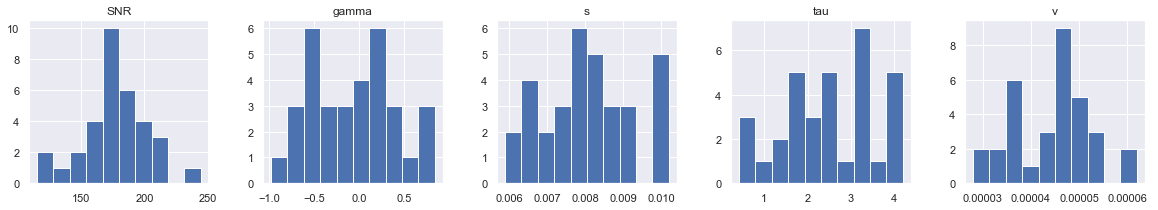

In [7]:
hist = params_part_dislike[['SNR','gamma','tau','v','s']].hist(figsize = [20,3] , layout=[1,5])

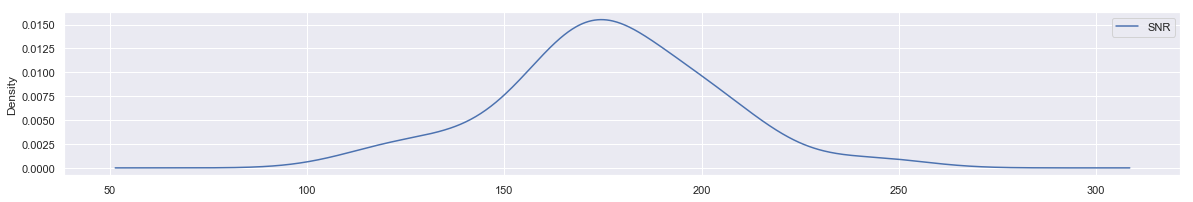

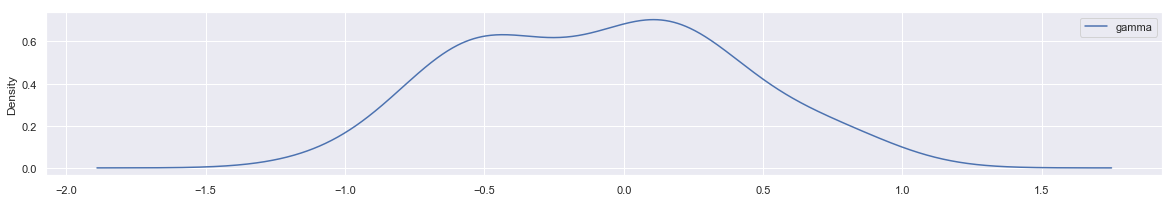

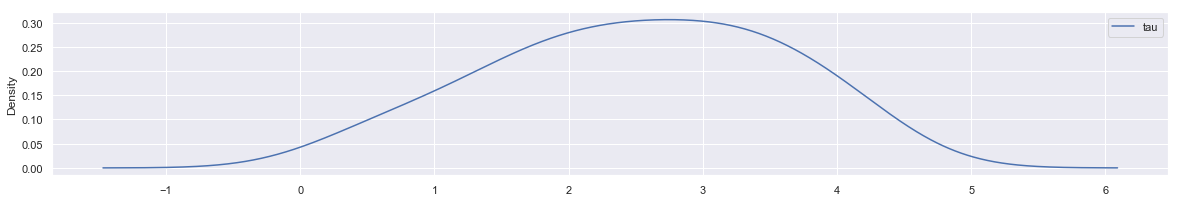

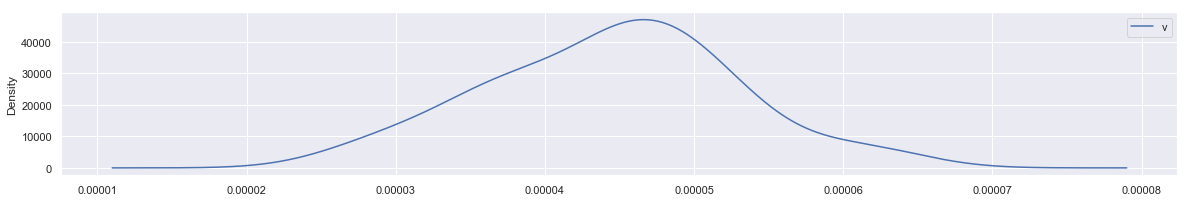

In [8]:
#plt.subplot(411)        
params_part_dislike[['SNR']].plot.kde(figsize = [20,3])
#plt.subplot(412)        
params_part_dislike[['gamma']].plot.kde(figsize = [20,3])
#plt.subplot(413)        
params_part_dislike[['tau']].plot.kde(figsize = [20,3])
#plt.subplot(414)        
params_part_dislike[['v']].plot.kde(figsize = [20,3])

In [9]:
# getting max, min and median values for our parameters from participants results
median_SNR_l = params_part_like[['SNR']].median().iloc[0]
median_gamma_l = params_part_like[['gamma']].median().iloc[0]
median_tau_l = params_part_like[['tau']].median().iloc[0]
median_v_l = params_part_like[['v']].median().iloc[0]
median_s_l = params_part_like[['s']].median().iloc[0]

medians_l = [ median_SNR_l , median_gamma_l, median_tau_l ,median_v_l ,median_s_l ]

max_SNR_l = params_part_like[['SNR']].max().iloc[0]
max_gamma_l = params_part_like[['gamma']].max().iloc[0]
max_tau_l = params_part_like[['tau']].max().iloc[0]
max_v_l = params_part_like[['v']].max().iloc[0]
max_s_l = params_part_like[['s']].max().iloc[0]

maxims_l = [ max_SNR_l , max_gamma_l, max_tau_l ,max_v_l ,max_s_l ]

min_SNR_l = params_part_like[['SNR']].min().iloc[0]
min_gamma_l = params_part_like[['gamma']].min().iloc[0]
min_tau_l = params_part_like[['tau']].min().iloc[0]
min_v_l = params_part_like[['v']].min().iloc[0]
min_s_l = params_part_like[['s']].min().iloc[0]

minis_l = [min_SNR_l , min_gamma_l, min_tau_l ,min_v_l ,min_s_l]

params_label = ['SNR','gamma','tau','v','s']

summary_l=[]
summary_l = np.column_stack((params_label, medians_l, maxims_l, minis_l))
summary_l = pd.DataFrame(summary_l, columns = ['params','med','maxims' ,'mins'])

In [10]:
## Merge dislike and like conditions in one dataframe

params_part_dislike['cond'] = 'Dislike'
params_part_like['cond'] = 'Like'
params_part_dislike['part'] = range(33)
params_part_like['part'] = range(33)
params_participants = [params_part_like , params_part_dislike]
params_participants = pd.concat(params_participants)
#params_participants = params_participants.reset_index()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


## We used repeated measures t-test to look for differences between both conditions.

In [11]:
diff = mean(params_part_like.SNR) - mean(params_part_dislike.SNR)
[s, p] = stats.ttest_rel(params_part_like.SNR,params_part_dislike.SNR)
print ("SNR: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.gamma) - mean(params_part_dislike.gamma)
[s, p] = stats.ttest_rel(params_part_like.gamma,params_part_dislike.gamma)
print ("Gamma: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.tau) - mean(params_part_dislike.tau)
[s, p] = stats.ttest_rel(params_part_like.tau,params_part_dislike.tau)
print ("Tau: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.v) - mean(params_part_dislike.v)
[s, p] = stats.ttest_rel(params_part_like.v,params_part_dislike.v)
print ("V: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.s) - mean(params_part_dislike.s)
[s, p] = stats.ttest_rel(params_part_like.s,params_part_dislike.s)
print ("S: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

SNR: [Like - Dislike] =  -33.27303030303034 ; p-value =1.9237610407322756e-05
Gamma: [Like - Dislike] =  -0.18878787878787884 ; p-value =0.010210160205840296
Tau: [Like - Dislike] =  0.6506060606060609 ; p-value =0.009827740750153378
V: [Like - Dislike] =  9.696969696969704e-06 ; p-value =1.905256102733628e-05
S: [Like - Dislike] =  -0.000179939393939392 ; p-value =0.3957438707042381


## Violin plot for the comparison of the parameters

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


([<matplotlib.axis.XTick at 0x1c293769e8>,
 <a list of 2 Text xticklabel objects>)

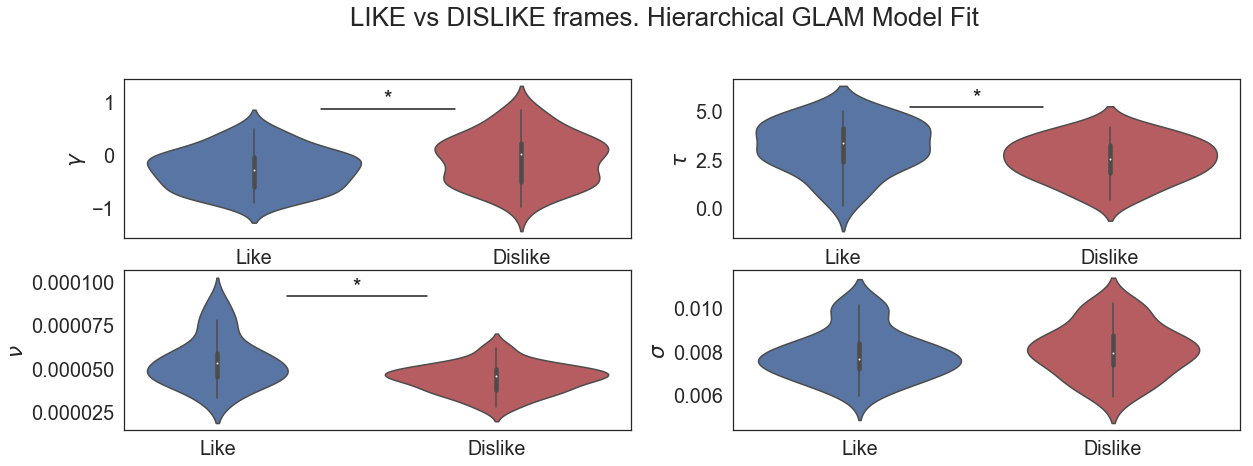

In [28]:
f = plt.figure(figsize=(20,10))
sns.set(style='white', font_scale=1.8)
plt.suptitle('LIKE vs DISLIKE frames. Hierarchical GLAM Model Fit')

#my_pal = {"r","b","b","y","r"}

my_pal = {0: "b", 1: "r"}

plt.subplot(321)

## ** Since SNR is dependent on gamma we plot gamma as the free parameter 

### FOR SNR
##all_arr = [params_part_like.SNR,
##          params_part_dislike.SNR]
##bplot = sns.violinplot(data=all_arr , palette=my_pal).set( ylabel='SNR')
##plt.xticks([0, 1,], ['Like', 'Dislike'])

## Add asterisk
#x1, x2 = 0, 1   
#y_max = max([params_part_like.SNR.max(), params_part_dislike.SNR.max()])
#y, h, col = y_max + y_max/50, y_max/50, 'k'
#plt.plot( [x1+0.1, x2-0.1], [ y+h, y+h], lw=1.5, c=col)
#plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

# FOR gamma
#plt.subplot(321)
all_arr1 = [params_part_like.gamma,
            params_part_dislike.gamma]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel=r'$\gamma$')
plt.xticks([0, 1,], ['Like', 'Dislike'])

# Add asterisk
x1, x2 = 0, 1   
y_max = max([params_part_like.gamma.max(), params_part_dislike.gamma.max()])
y, h, col = y_max + y_max/50, y_max/50, 'k'
plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

# FOR tau
plt.subplot(322)
all_arr1 = [params_part_like.tau,
            params_part_dislike.tau]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel=r'$\tau$')
plt.xticks([0, 1,], ['Like', 'Dislike'])

# Add asterisk
x1, x2 = 0, 1   
y_max = max([params_part_like.tau.max(), params_part_dislike.tau.max()])
y, h, col = y_max + y_max/50, y_max/50, 'k'
plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

# FOR v
plt.subplot(323)
all_arr1 = [params_part_like.v,
            params_part_dislike.v]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel=r'$\nu$')
plt.xticks([0, 1,], ['Like', 'Dislike'])

# Add asterisk
x1, x2 = 0, 1   
y_max = max([params_part_like.v.max(), params_part_dislike.v.max()])
y, h, col = y_max + y_max/50, y_max/50, 'k'
plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

# FOR s
plt.subplot(324)
all_arr1 = [params_part_like.s,
            params_part_dislike.s]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel=r'$\sigma$')
plt.xticks([0, 1,], ['Like', 'Dislike'])


## Plot independent points for each participant instead of a cloud

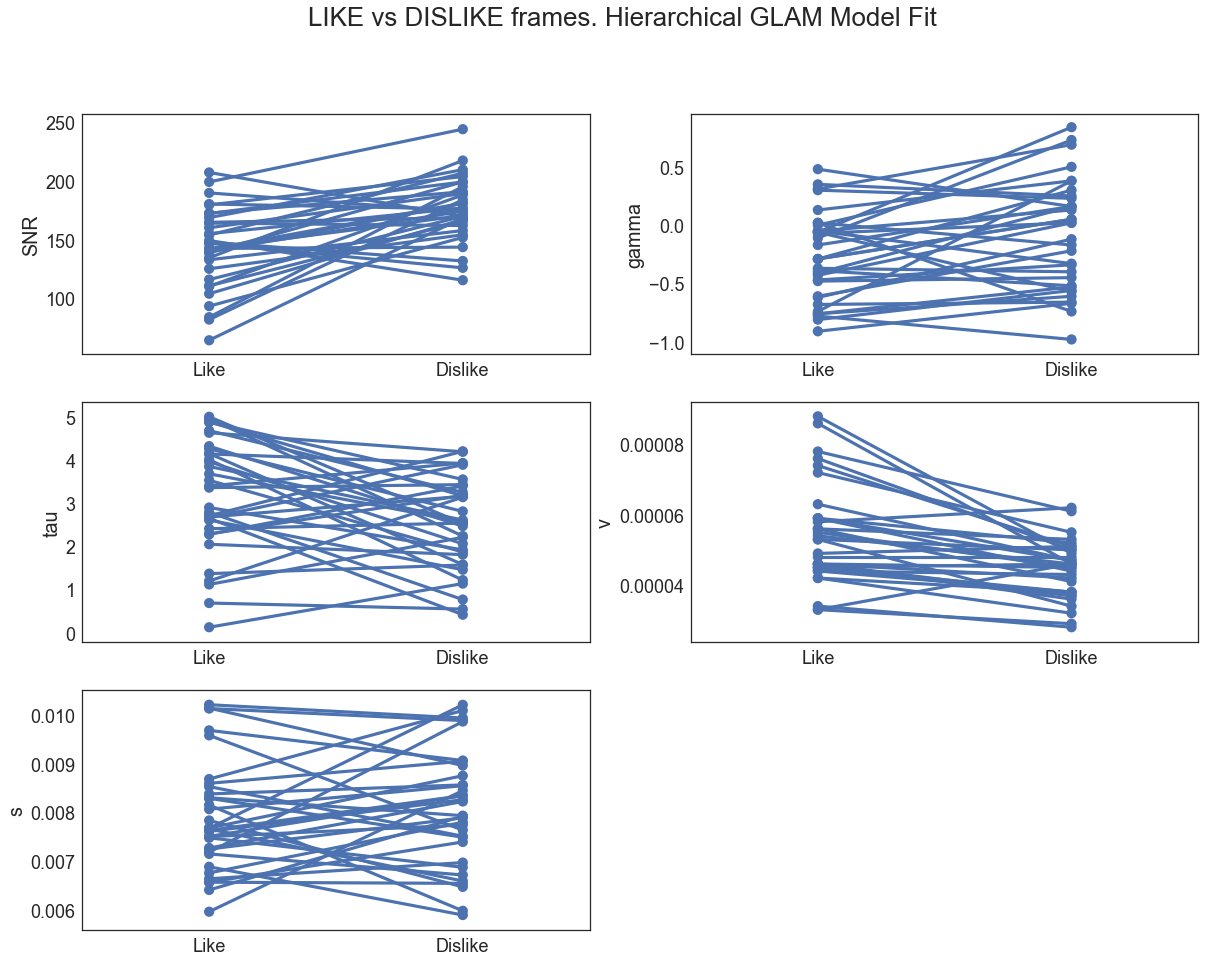

In [16]:
plt.figure(figsize=(20,15))
sns.set(style='white', font_scale=1.8)
plt.suptitle('LIKE vs DISLIKE frames. Hierarchical GLAM Model Fit')

#my_pal = {"r" ,"b"}

#ax1 = sns.pointplot(x="cond", y="v", palette = my_pal,  data=params_participants, hue = 'cond');



plt.subplot(321)
# FOR SNR
for i in range(33):
    param_indiv = params_participants.loc[params_participants['part'] == i]
    ax1 = sns.pointplot(x="cond", y="SNR",  data=param_indiv);
    ax1.set(ylabel='SNR', xlabel='')



# FOR gamma
plt.subplot(322)
for i in range(33):
    param_indiv = params_participants.loc[params_participants['part'] == i]
    ax1 = sns.pointplot(x="cond", y="gamma",  data=param_indiv);
    ax1.set(ylabel='gamma', xlabel='')

## FOR tau
plt.subplot(323)
for i in range(33):
    param_indiv = params_participants.loc[params_participants['part'] == i]
    ax1 = sns.pointplot(x="cond", y="tau",  data=param_indiv);
    ax1.set(ylabel='tau', xlabel='', )

## FOR v
plt.subplot(324)

for i in range(33):
    param_indiv = params_participants.loc[params_participants['part'] == i]
    ax1 = sns.pointplot(x="cond", y="v",  data=param_indiv);
    ax1.set(ylabel='v', xlabel='', )            
            

# FOR s
plt.subplot(325)
for i in range(33):
    param_indiv = params_participants.loc[params_participants['part'] == i]
    ax1 = sns.pointplot(x="cond", y="s",  data=param_indiv);
    ax1.set(ylabel='s', xlabel='')


## **The significant differences are mantained independently of the repetition of the fit**